In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

In [3]:
# Read data
df = pd.read_csv(r"C:\\cse\\uni\\ads\\website_data.csv")

In [4]:
# Transform data
df = np.log(df)


In [5]:
# Split data
df_train = df.iloc[:-30]
df_test = df.iloc[-30:]


In [6]:
# ADF test
adf_test = adfuller(df_train)
print(f'p-value: {adf_test[1]}')

p-value: 0.24126116082883903


In [7]:
# Differencing
df_train_diff = df_train.diff().dropna()

In [8]:
# ADF test after differencing
adf_test = adfuller(df_train_diff)
print(f'p-value: {adf_test[1]}')


p-value: 0.022059461239126152


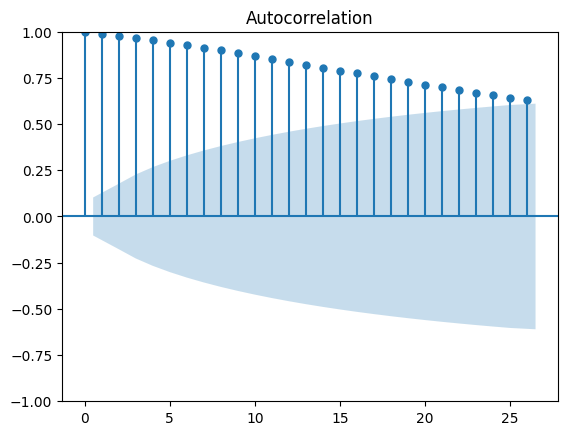

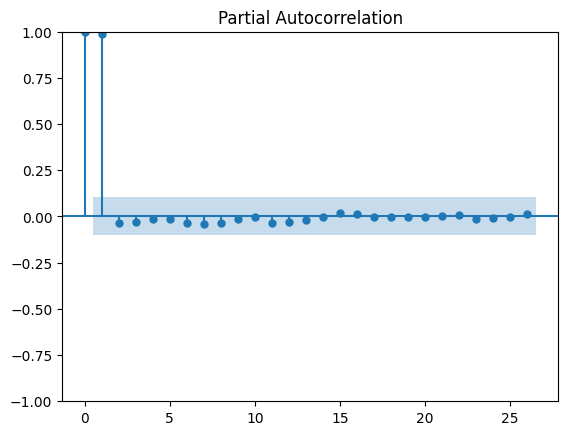

In [13]:
acf_original = plot_acf(df_train)
pacf_original = plot_pacf(df_train)

In [9]:
# Fit ARIMA model
model = ARIMA(df_train, order=(2,1,0))
model_fit = model.fit()

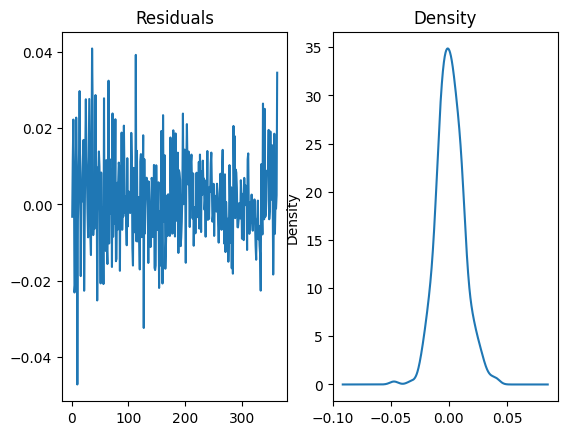

In [10]:
# Residual analysis
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

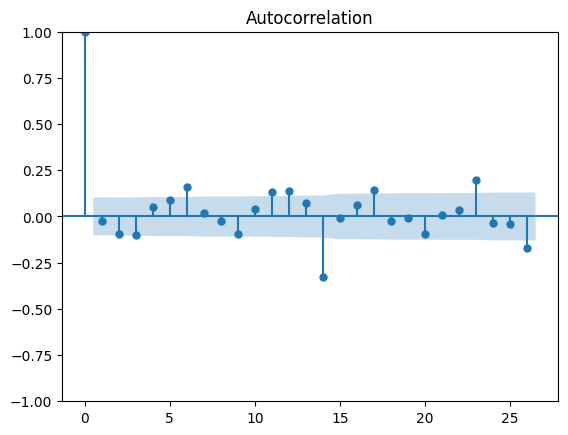

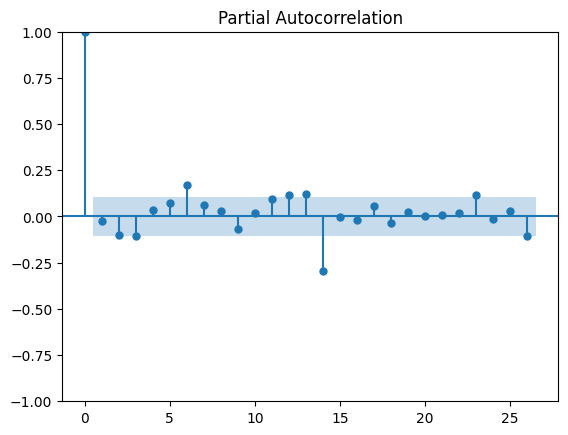

In [14]:
acf_res = plot_acf(residuals)
pacf_res = plot_pacf(residuals)

<Axes: >

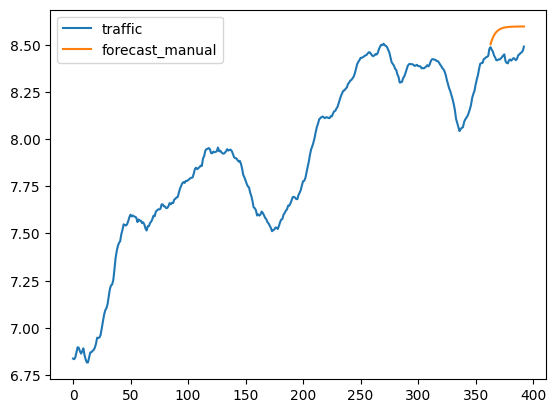

In [11]:
# Forecast
forecast_test = model_fit.forecast(len(df_test))
df['forecast_manual'] = [None]*len(df_train) + list(forecast_test)
df.plot()